<a href="https://colab.research.google.com/github/qweliant/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

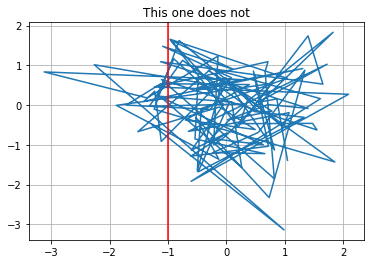

In [2]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, ax = plt.subplots()
ax.plot(data[0], data[1])
plt.axvline(x=-1, color='red')
plt.title("This one does not")
ax.grid()
plt.show()


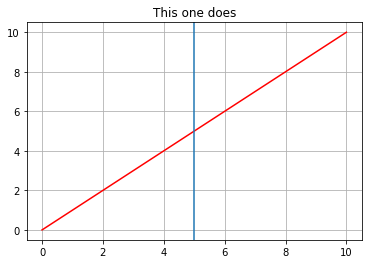

In [3]:
x = np.linspace(0, 10, 1000)
plt.plot(x,x+0,linestyle='solid', color='red')
plt.title("This one does")
plt.axvline(x=5)
plt.grid()
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"



> Indented block



```
# They do not have unique outputs for their inputs
```



# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

- Relation 1: No because x=1 has two outputs
- Relation 2: Yes becasue all x values are unique
- Relation 3: No because x=1 has two outputs
- Relation 4: No because x=1 has two outputs
- Relation 5: No because x=1 has two outputs

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

- mR3, to codomain R3
- mR4, to codomain R2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

https://en.wikipedia.org/wiki/Overdetermined_system 
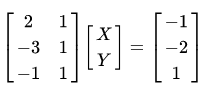

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [4]:
v1 = np.array([np.sin(np.array((0., 30., 45., 60., 90.))), np.pi])
v2 = np.array([10,17,22])

p = np.array([[1,3],[2,-1]])
q = np.array([[4,1,2],[-1,2,3],[5,1,-2]])


print(np.dot(p, v1))
print(np.dot(q, v2))

print(np.array([v1[0] + 3*v1[1], 2*v1[1] - v1[0]]))
print(np.array([4*v2[0] + v2[1] +  2*v2[2], 2*v2[1] - v2[0] + 3*v2[2], 5*v2[0] - 2*v2[2] + v2[1]]))

[array([ 9.42477796,  8.43674634, 10.27568149,  9.11996734, 10.31877462])
 array([-3.14159265, -5.1176559 , -1.4397856 , -3.7512139 , -1.35359933])]
[101  90  23]
[[ 9.42477796  8.43674634 10.27568149  9.11996734 10.31877462]
 [ 6.28318531  7.27121693  5.43228178  6.58799593  5.38918864]]
[101  90  23]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

eigenvalues would be the scaler of vector A, that could represent matrix A multiplied by matrix B. When scaled by the eigen value, the vector is called the eigenvector

# The Curse of Dimensionality



## 6.1 What are some of the challenges of working with high dimensional spaces?

 space that is  > 33 dimensions are difficult to perceive

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5 times more observations than parameters

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [0]:
import os.path
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import pandas as pd

# Read National Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
national = pd.read_csv(national_file)[["BUILT", "VALUE"]]

In [7]:
# Look at first 5 rows
print(national.shape)
national.head()

(64535, 2)


,BUILT,VALUE
0,2006,40000
1,1980,130000
2,1985,150000
3,1985,200000
4,1980,-6


In [8]:
# Look at datatypes
# a lot of object datatypes even though they look to be strings of numbers.
national.dtypes

BUILT    int64
VALUE    int64
dtype: object

In [9]:
# check for null values
national.isnull().sum().any()

False

In [10]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

0 categorical columns
2 numerical columns


In [13]:
national_sampled = national.sample(30000, axis=0)
national_processed = pd.get_dummies(national_sampled)[["BUILT", "VALUE"]]
# national_processed = national.copy()

# # Get One-Hot-Encoding of categorical variables
# national_processed = pd.get_dummies(national_processed)
# print(national_processed.shape)
print(national_processed.shape)
national_processed.head()


(30000, 2)


,BUILT,VALUE
10711,1920,-6
20788,1970,130000
13187,1960,300000
44410,1990,90000
60591,1995,-6



 processed data: 
 [[ 1.5041963  -0.40972765]
 [ 0.5157731  -0.04831944]
 [ 0.70585449  0.0319935 ]
 ...
 [-1.00487797 -0.57037761]
 [-1.38504073 -0.57037761]
 [ 1.73229396 -0.57037761]]


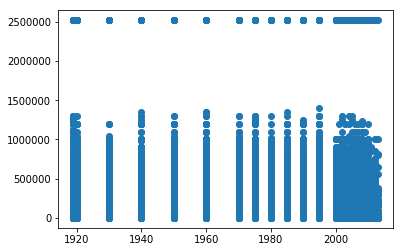

In [18]:
### Your Code Here
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



plt.scatter(national["BUILT"], national["VALUE"])
scaler = StandardScaler()
processed = scaler.fit_transform(national)
print("\n processed data: \n", processed)
pca = PCA(2)
pca.fit(processed)
B = pca.transform(processed)

In [20]:
B[:,0].shape

(64535,)

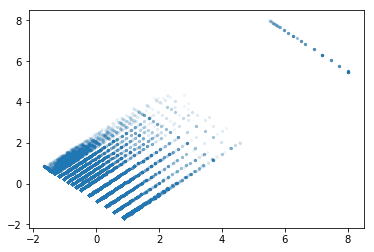

In [23]:
plt.scatter(B[:,1], B[:,0], alpha=0.05, s=5)
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)